<a href="https://colab.research.google.com/github/bhushanbkt/Programatically-Understanding-ML/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Importing libaries
import pandas as pd
import jax.numpy as jnp
from jax import grad ,jit ,vmap 
from jax import random


import tensorflow_datasets as tfds

In [5]:
import tensorflow as tf

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
df= tfds.load('mnist', split='train',shuffle_files=True )
assert isinstance(df,tf.data.Dataset)
print(df)

local data directory. If you'd instead prefer to read directly from our public
GCS bucket (recommended if you're running on GCP), you can instead pass
`try_gcs=True` to `tfds.load` or set `data_dir=gs://tfds-data/datasets`.



Dl Completed...:   0%|          | 0/4 [00:00<?, ? file/s]


Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.
<_OptionsDataset element_spec={'image': TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>


In [8]:
df

<_OptionsDataset element_spec={'image': TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>

In [9]:
import matplotlib.pyplot as plt
from tensorflow import keras



In [10]:
(X_train , y_train ) , (X_test,y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [11]:
X_train[0].shape

(28, 28)

In [12]:
y_train.shape

(60000,)

In [13]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

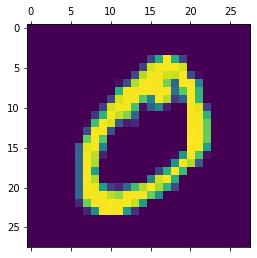

In [14]:
plt.matshow(X_train[1])

In [15]:
y_train[10]

3

In [16]:
X_train = X_train/255
X_test =X_test/255

In [17]:
y_train[:4]

array([5, 0, 4, 1], dtype=uint8)

In [18]:
X_train_fltend=X_train.reshape(len(X_train),28*28)
X_test_flatend = X_test.reshape(len(X_test),28*28)

In [19]:
X_test.shape

(10000, 28, 28)

In [20]:
X_test_flatend.shape

(10000, 784)

In [21]:
X_train_fltend[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [22]:
model=tf.keras.Sequential()
model.add(tf.keras.Input(shape=(784,)))
model.add(tf.keras.layers.Dense(10,activation='sigmoid'))


In [23]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )

model.fit(X_train_fltend,y_train ,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 2ms/step - loss: 0.4629 - accuracy: 0.8781
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3036 - accuracy: 0.9152
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2836 - accuracy: 0.9204
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2735 - accuracy: 0.9232
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2669 - accuracy: 0.9258


In [24]:
model.evaluate(X_test_flatend,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2647 - accuracy: 0.9259


[0.26474469900131226, 0.9258999824523926]

In [25]:
y_predicted =model.predict(X_test_flatend)
y_predicted

array([[2.0906143e-02, 1.9371406e-07, 5.4048661e-02, ..., 9.9973732e-01,
        8.6480327e-02, 6.3544524e-01],
       [4.5945790e-01, 2.4882772e-03, 9.9972409e-01, ..., 9.2228883e-13,
        1.9821957e-01, 2.1933082e-09],
       [3.8895814e-04, 9.9243516e-01, 6.6335994e-01, ..., 1.4294606e-01,
        3.9157084e-01, 4.4388078e-02],
       ...,
       [3.4988584e-06, 1.7339561e-06, 8.3679293e-04, ..., 2.5299463e-01,
        5.3293669e-01, 7.9367709e-01],
       [1.2492276e-04, 1.6023338e-04, 1.3552466e-04, ..., 4.8615686e-05,
        6.1561769e-01, 8.0354679e-05],
       [1.9885305e-02, 3.2543837e-10, 2.2698995e-01, ..., 1.3617841e-08,
        3.6471576e-04, 5.7976774e-07]], dtype=float32)

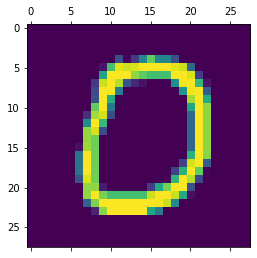

In [26]:
plt.matshow(X_test[10])

In [27]:
y_predicted[0]

array([2.0906143e-02, 1.9371406e-07, 5.4048661e-02, 9.5559472e-01,
       3.0566684e-03, 1.1465892e-01, 1.3073721e-06, 9.9973732e-01,
       8.6480327e-02, 6.3544524e-01], dtype=float32)

In [29]:
import numpy as np
np.argmax(y_predicted[10])

0

In [30]:
y_predicted_label=[np.argmax(i) for i in y_predicted]

In [31]:
y_predicted_label[:3]

[7, 2, 1]

In [32]:
y_test[:3]

array([7, 2, 1], dtype=uint8)

In [33]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_label)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 962,    0,    1,    2,    0,    5,    7,    2,    1,    0],
       [   0, 1109,    3,    2,    0,    1,    4,    2,   14,    0],
       [   5,    6,  921,   16,   11,    5,   13,   11,   41,    3],
       [   3,    0,   21,  918,    1,   25,    2,    9,   23,    8],
       [   1,    1,    3,    2,  915,    0,   12,    4,    9,   35],
       [   8,    2,    3,   30,    9,  782,   14,    5,   32,    7],
       [  10,    3,    6,    1,    8,   13,  912,    2,    3,    0],
       [   1,    5,   23,    4,    9,    0,    0,  945,    2,   39],
       [   5,    6,    7,   17,    9,   26,   10,   10,  878,    6],
       [  10,    7,    1,   10,   28,    6,    0,   21,    9,  917]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

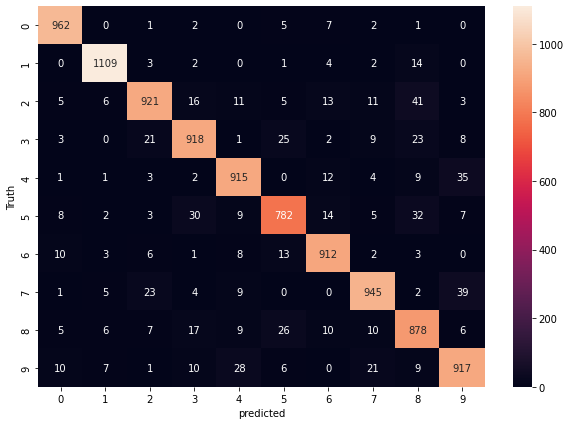

In [34]:

import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('Truth')

In [35]:
#creating other model with `hidden_layer`'
model=keras.Sequential([
                        keras.layers.Dense(100,input_shape=(784,),activation='relu'),
                        keras.layers.Dense(10,activation='sigmoid')
])


model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history=model.fit(X_train_fltend, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2710 - accuracy: 0.9227
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1228 - accuracy: 0.9638
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0849 - accuracy: 0.9748
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0636 - accuracy: 0.9809
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0514 - accuracy: 0.9846


In [36]:
model.evaluate( X_test_flatend,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0825 - accuracy: 0.9753


[0.08254361152648926, 0.9753000140190125]

Text(69.0, 0.5, 'Truth')

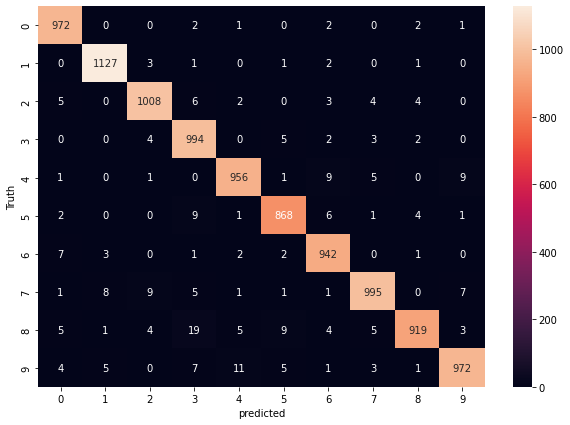

In [37]:

y_predicted =model.predict(X_test_flatend)
y_predicted_label = [np.argmax(i) for i in y_predicted]
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_label)


plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('Truth')

In [39]:
## By adding hidden layer our acccurecy get increased`

In [38]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

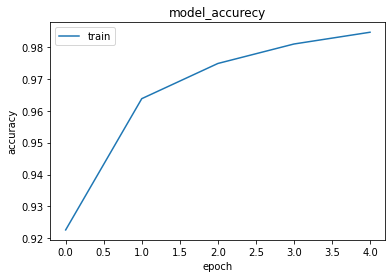

In [40]:
plt.plot(history.history['accuracy'])
plt.title('model_accurecy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'],loc='upper left')
plt.show()

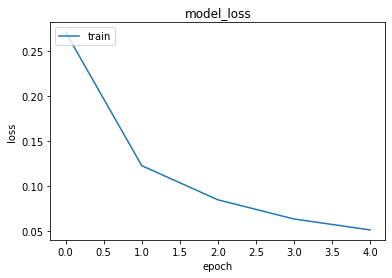

In [41]:
plt.plot(history.history['loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'],loc='upper left')
plt.show()